###recognising MNIST handwritten digits using KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv('/Users/paraskaushik/Desktop/FOOD/CODES/DATA_SCIENCE/machine-learning-online-2018/Datasets/MNIST-1/train.csv')
print(df.shape)

(19999, 785)


In [10]:
print(df.columns)

Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.670', '0.671', '0.672', '0.673', '0.674', '0.675', '0.676', '0.677',
       '0.678', '7'],
      dtype='object', length=785)


In [12]:
data = df.values

In [71]:
X = data[:,:784]
Y = data[:,784]

In [72]:
print(X.shape,Y.shape)

(19999, 784) (19999,)


In [73]:
split = int(0.8*X.shape[0])
print(split)

15999


In [109]:
X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[:split]

print(X_test.shape)

(4000, 784)


In [91]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,pt,k=5):
    vals = []
    m = X_train.shape[0]
    for i in range(m):
        d = dist(pt,X_train[i])
        vals.append((d,Y_train[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    
    #print(vals)
    #print(vals.shape)
    
    newvals = np.unique(vals[:,1],return_counts=True)
    #print(newvals)
    index = newvals[1].argmax()
    belong = newvals[0][index]
    return int(belong)

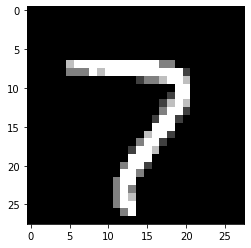

In [125]:
def draw(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show

draw(X_test[232])

In [126]:
pred = knn(X_train,Y_train,X_test[232])
print(pred)

7
